In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Steps to solve the question

### Question 1

In [311]:
folds_number = 0
folded_thickness = 0

while folded_thickness <= 8848000:
    folds_number = folds_number + 1
    folded_thickness = pow(2, folds_number)
    
print(folds_number)

24


### Question 2

##### Steps to solve the question

V(t) = V(0)exp(-at)

a = -0.1

at half: V(t) = V(0)/2

Now: V(0)/2 = V(0)exp(-at)

1/2 = exp(-0.1t)

exp(-0.1t) = 1/2

log(e^-01t) = log(1/2)

-0.1t = log(1/2)


In [316]:
# answer
print("It will take" , np.log(1/2)/(-0.1), "time")

It will take 6.931471805599452 time


### Question 3

In [320]:
# Formula: A = P(1+(r/n))**nt
P=100
r=5/100
n=1 #Frequency is 1 since the annualized interest rate is compounded annually
# Finding the amount after year 1: Amount=pow(P(1+r/n), nt) 

for t in [1, 2, 3, 4, 5]:
    Amount= P * (1 + (r / n)) ** (n * t)
    print(round(Amount))

105
110
116
122
128


### Question 4

In [319]:
# M = Pr / 1 −(1+r)**−n

# M: is the monthly payment
# P: is the original principal amount
# r: is the interest rate per month (annual interest divided by 12)
# n: is the number of months to repay the loan

P=20000
r=0.01 # the 1% interest rate

for year in [1, 2, 3]:
    M = round((P * r) / (1 - ((1 + r)** (- (year * 12))))) #Applying the "M = Pr / 1 −(1+r)**−n" formula
    print("Year", year, ":", M)

Year 1 : 1777
Year 2 : 941
Year 3 : 664


### Question 5

In [336]:
init_invest = 100000
cust_nbr = 100
pymts = 0
acc_pymts_list = []
days_nbr = 0
days_list = []

while pymts <= init_invest:                       # iterate until the payments is greater than or equal to amount invested
    cust_nbr = cust_nbr + (cust_nbr * (1/100))    # updating customers
    days_nbr = days_nbr + 1                       # updating days
    days_list.append(days_nbr)                    # Keeping track of the number of days
    pymts = pymts + cust_nbr * 10                 # updating the payments
    acc_pymts_list.append(pymts)                  # Keeping track of accumulated profit for each day
    
print(days_nbr)

70


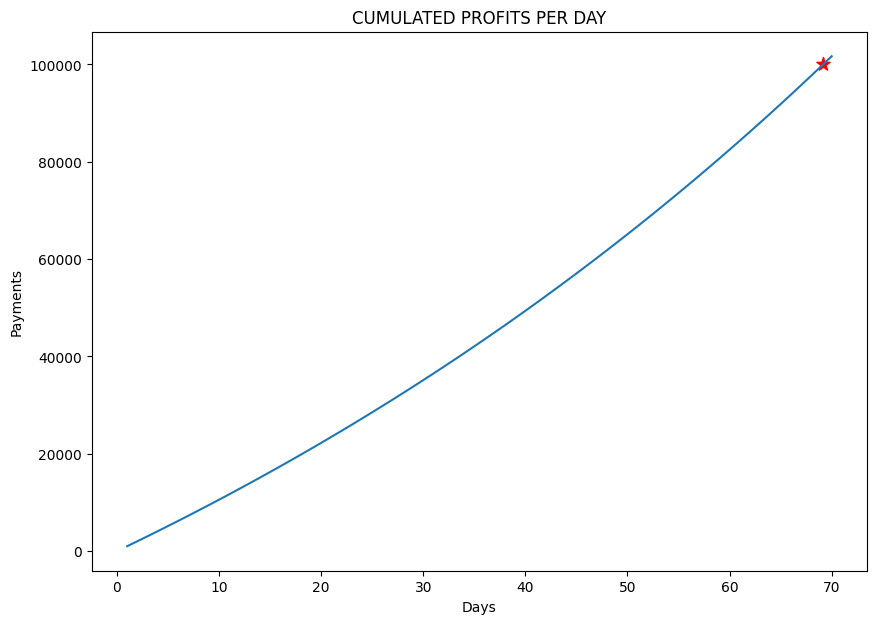

In [370]:
# Plotting cumulated profits per day, show initial investment and mark breakeven day. === matplotlib
plt.figure(figsize=(10, 7))
plt.plot(days_list, acc_pymts_list)

plt.title("CUMULATED PROFITS PER DAY")
plt.xlabel("Days")
plt.ylabel("Payments") 

profit_day = np.interp(init_invest, acc_pymts_list , days_list)

plt.scatter(profit_day, init_invest, color = 'red', s=100, marker = '*')                # Plotting the last days vs the initial investment

plt.show()

### Question 6

In [308]:
EbolaDataSet = pd.read_excel('ebola_download.xls')

In [309]:
# to get information about the dataset
EbolaDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      80 non-null     datetime64[ns]
 1   Cases     80 non-null     int64         
 2   Death     80 non-null     int64         
 3   Diff      80 non-null     int64         
 4   Noofdays  80 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 3.2 KB


In [164]:
#to check if there any null value
EbolaDataSet.isnull().sum()

Date        0
Cases       0
Death       0
Diff        0
Noofdays    0
dtype: int64

In [165]:
EbolaDataSet

,Date,Cases,Death,Diff,Noofdays
0,2014-03-22,49,29,2,1
1,2014-03-24,86,59,1,3
2,2014-03-25,86,60,1,4
3,2014-03-26,86,62,1,5
4,2014-03-27,111,72,1,6
...,...,...,...,...,...
75,2014-11-02,13014,5191,2,226
76,2014-11-04,13200,5275,5,228
77,2014-11-09,14068,5496,2,233
78,2014-11-11,14383,5492,1,235


In [166]:
EbolaDataSet.tail()

,Date,Cases,Death,Diff,Noofdays
75,2014-11-02,13014,5191,2,226
76,2014-11-04,13200,5275,5,228
77,2014-11-09,14068,5496,2,233
78,2014-11-11,14383,5492,1,235
79,2014-11-12,14413,5498,-41955,236


In [167]:
size=EbolaDataSet.shape[0]

In [168]:
date1=EbolaDataSet.Date[0]
date1

Timestamp('2014-03-22 00:00:00')

In [169]:
date2=EbolaDataSet.Date[size-1]
date2

Timestamp('2014-11-12 00:00:00')

In [170]:
Date_range=pd.date_range(start="2014-03-22",end="2014-11-12")
Date_range2=pd.date_range(start=date1,end=date2)

In [171]:
#Date_range.info()

In [172]:
len(Date_range)

236

In [173]:
EbolaData=EbolaDataSet.set_index('Date')
EbolaData=EbolaData.reindex(Date_range)
EbolaData=EbolaData.rename_axis('Date').reset_index()

In [174]:
EbolaData

,Date,Cases,Death,Diff,Noofdays
0,2014-03-22,49.0,29.0,2.0,1.0
1,2014-03-23,NaN,NaN,NaN,NaN
2,2014-03-24,86.0,59.0,1.0,3.0
3,2014-03-25,86.0,60.0,1.0,4.0
4,2014-03-26,86.0,62.0,1.0,5.0
...,...,...,...,...,...
231,2014-11-08,NaN,NaN,NaN,NaN
232,2014-11-09,14068.0,5496.0,2.0,233.0
233,2014-11-10,NaN,NaN,NaN,NaN
234,2014-11-11,14383.0,5492.0,1.0,235.0


In [175]:
EbolaData.isnull().sum()

Date          0
Cases       156
Death       156
Diff        156
Noofdays    156
dtype: int64

In [183]:
#interpolate

In [184]:
EbolaData2=EbolaData.interpolate('ffill', limit_direction='forward')

In [221]:
EbolaData2

,Date,Cases,Death,Diff,Noofdays
0,2014-03-22,49.0,29.0,2.0,1.0
1,2014-03-23,49.0,29.0,2.0,1.0
2,2014-03-24,86.0,59.0,1.0,3.0
3,2014-03-25,86.0,60.0,1.0,4.0
4,2014-03-26,86.0,62.0,1.0,5.0
...,...,...,...,...,...
231,2014-11-08,13200.0,5275.0,5.0,228.0
232,2014-11-09,14068.0,5496.0,2.0,233.0
233,2014-11-10,14068.0,5496.0,2.0,233.0
234,2014-11-11,14383.0,5492.0,1.0,235.0


In [185]:
EbolaData2.isnull().sum()

Date        0
Cases       0
Death       0
Diff        0
Noofdays    0
dtype: int64

## cases values

In [274]:
ListCases=[100,500,1000,2000,5000]
UpCases=[]
for case in EbolaData2['Cases']:
    if case >=ListCases[0]: 
        break
    
UpCases.append(case)
print(UpCases[0])

111.0


In [275]:
ListCases=[100,500,1000,2000,5000]
UpCases2=[]
for case in EbolaData2['Cases']:
    if case >=ListCases[1]: 
        break
    
UpCases2.append(case) 
print(UpCases2[0])

522.0


In [276]:
ListCases=[100,500,1000,2000,5000]
UpCases3=[]
for case in EbolaData2['Cases']:
    if case >=ListCases[2]: 
        break
    
UpCases3.append(case)
print(UpCases3[0])

1048.0


In [277]:
ListCases=[100,500,1000,2000,5000]
UpCases4=[]
for case in EbolaData2['Cases']:
    if case >=ListCases[3]: 
        break
    
UpCases4.append(case) 
print(UpCases4[0])

2127.0


In [278]:
ListCases=[100,500,1000,2000,5000]
UpCases5=[]
for case in EbolaData2['Cases']:
    if case >=ListCases[4]: 
        break
    
UpCases5.append(case) 
print(UpCases5[0])

5339.0


## cases Date

In [291]:
DateCase1=EbolaData2[EbolaData2['Cases']==UpCases[0]]
DateCase1=DateCase1['Date']

DateCase2=EbolaData2[EbolaData2['Cases']==UpCases2[0]]
DateCase2=DateCase2['Date']

DateCase3=EbolaData2[EbolaData2['Cases']==UpCases3[0]]
DateCase3=DateCase3.iloc[0]
DateCase3=DateCase3['Date']
DateCase4=EbolaData2[EbolaData2['Cases']==UpCases4[0]]
DateCase4=DateCase4.iloc[0]
DateCase4=DateCase4['Date']
DateCase5=EbolaData2[EbolaData2['Cases']==UpCases5[0]]
DateCase5=DateCase5.iloc[0]
DateCase5=DateCase5['Date']


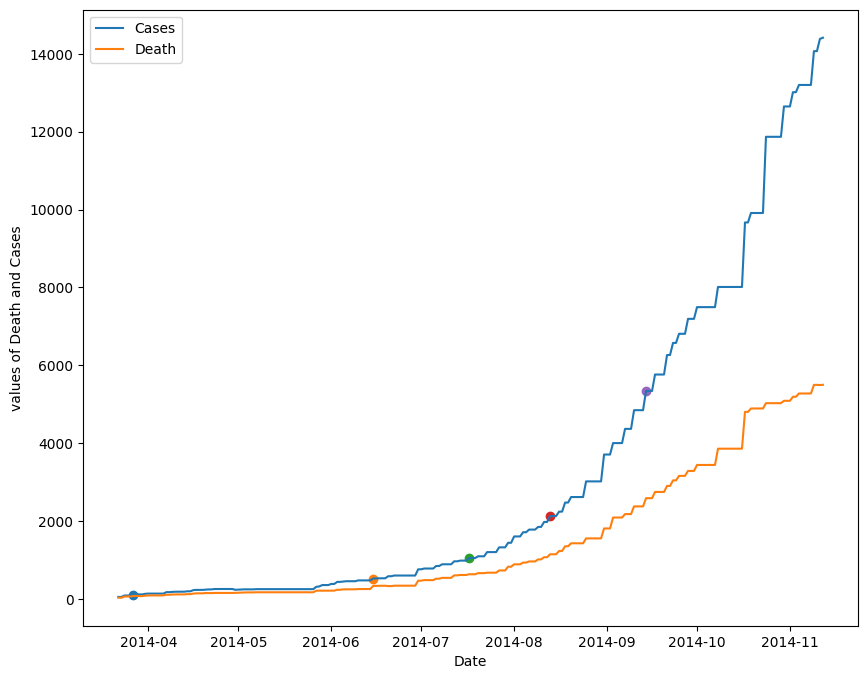

In [293]:
CaseData=EbolaData2["Cases"]
DeathData=EbolaData2["Death"]
plt.figure(figsize=(10,8))
plt.plot(EbolaData2.Date,CaseData,label='Cases')
plt.scatter(DateCase1,UpCases[0])
plt.scatter(DateCase2,UpCases2[0])
plt.scatter(DateCase3,UpCases3[0])
plt.scatter(DateCase4,UpCases4[0])
plt.scatter(DateCase5,UpCases5[0])
plt.plot(EbolaData2.Date,DeathData,label='Death')
plt.ylabel("values of Death and Cases")
plt.xlabel("Date")
plt.legend()
plt.show()